 # Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+.

Проблема: Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Задача: разобраться в причинах и помочь компании выйти в плюс.

Период исследования: с 1 мая по 27 октября 2019 года.

Необходимо изучить: 

- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.


## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime, timedelta

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

Далее выведем информацию о загруженных датасетах.


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Выведем первые строки загруженных датасетов

In [6]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выводы:

Во всех датасетах нет пропущенных данных, это положительный момент.

В датасетете visits:
- Привести названия столбцов к нижнему регистру;
- Преобразовать типы данных в столбцах Session Start и Session End;

В датасетет orders:
- Привести названия столбцов к нижнему регистру;
- Изменить тип данных в столбце Event Dt;

В датасете costs:
- Привести названия столбцов к нижнему регистру;
- Преобразовать тип данных в столбце dt.

### Подготовка данных

##### Изменение названий столбцов

Приведем названия столбцов к нижнему регистру и приведем названия к "змеиному языку" в датасете visits:

In [10]:
visits.columns = visits.columns.str.lower()z

visits.columns = visits.columns.str.replace(' ', '_')

visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Приведем названия столбцов к нижнему регистру и приведем названия к "змеиному языку" в датасете orders:



In [10]:
orders.columns = orders.columns.str.lower()

orders.columns = orders.columns.str.replace(' ', '_')

orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Приведем названия столбцов к нижнему регистру и приведем названия к "змеиному языку" в датасете costs:


In [11]:
costs.columns = costs.columns.str.lower()

costs.columns = costs.columns.str.replace(' ', '_')

costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


##### Изменение типов данных

Преобразуем данные о времени во всех датасетах.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['dt'] = pd.to_datetime(visits['session_start']).dt.date

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt'])

Проверим получившиеся изменения:

In [13]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
 6   dt             309901 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 16.6+ MB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


### Проверка на дубликаты

Прверим датасеты на наличие явных дубликатов:

In [16]:
visits.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

In [18]:
costs.duplicated().sum()

0

In [ ]:
# Код ревьюера
def inspect(df):
    display(df.head()) 
    df.info() 
    print ('Количество дубликатов -', df.duplicated().sum())
    numeric_columns=df.describe().columns
    display(df.describe())
    display()
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

    return df

visits = inspect(visits)


Явных дубликатов нет, это отлично. Теперь проверим наличие дубликатов строк внутри датасетов:

In [19]:
visits[visits.duplicated(keep='last')].sum()

user_id    0.0
region     0.0
device     0.0
channel    0.0
dt         0.0
dtype: float64

In [20]:
orders[orders.duplicated(keep='last')].sum()

user_id    0.0
revenue    0.0
dtype: float64

In [21]:
costs[costs.duplicated(keep='last')].sum()

channel    0.0
costs      0.0
dtype: float64

дубликатов строк так же нет в исследуемых датасетах. Значит мы можем продолжить работу над проектом.

### Вывод

На данном этапе проекта мы подготовили данные для последующего анализа:

- Произвели загрузку данных;
- Проверили наличие пропусков;
- Изменили названия столбцов и привели их к "змеиному" языку;
- Изменили типы данных в столбцах с временем для дальнейшей работы с ними;
- Проверили наличие дубликатов, коих не оказалось.


## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Функция для создания профилей пользователей:

In [22]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    profiles['dt'] = pd.to_datetime(profiles['dt'])
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )
    new_users['dt'] = pd.to_datetime(new_users['dt'])

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

Функция для подсчета Retention Rate

In [23]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для подсчета конверсии

In [24]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [25]:
 # функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функции для построения графиков:



In [26]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

Составим профили пользователей и определим минимальную и максимальную даты их привлечения.

In [30]:
#Таблица профилей пользователя

profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
# определим минимальную и максимальную дату привлечения

min_date = profiles['first_ts'].min()
max_date = profiles['first_ts'].max()

print(min_date)
print(max_date)

2019-05-01 00:00:41
2019-10-27 23:59:04


Выборка соответствует периоду времени, заявленному в задании, значит мы можем продолжить нашу работу.

#### Страны пользователей приложения и платящие пользователи

Посмотрим в каких странах пользуются приложением

In [32]:
regions = profiles.groupby('region').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'users'}). \
    sort_values(by='users', ascending=False)

regions

,users
region,
United States,100002
UK,17575
France,17450
Germany,14981


Приложение наиболее распространено в Соединенных Штатах, далее следуют европейские страны: Великобритания, Франция и Германия.

Посмотрим как распределяются платящие пользователи приложения по регионам и сразу определим их долю:

In [33]:
payers_region = profiles.query('payer == True'). \
    groupby('region').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'payers'}). \
    reset_index()

payers_region

,region,payers
0,France,663
1,Germany,616
2,UK,700
3,United States,6902


In [34]:
#Объединим датафреймы:

regions = regions.merge(payers_region, on='region')

#Создадим столбец с долей платящих пользователей

regions['payers_fraction'] = (
    regions['payers'] / regions['users']
)

regions

,region,users,payers,payers_fraction
0,United States,100002,6902,0.069019
1,UK,17575,700,0.039829
2,France,17450,663,0.037994
3,Germany,14981,616,0.041119


Построим график, чтобы визуализировать полученные данные

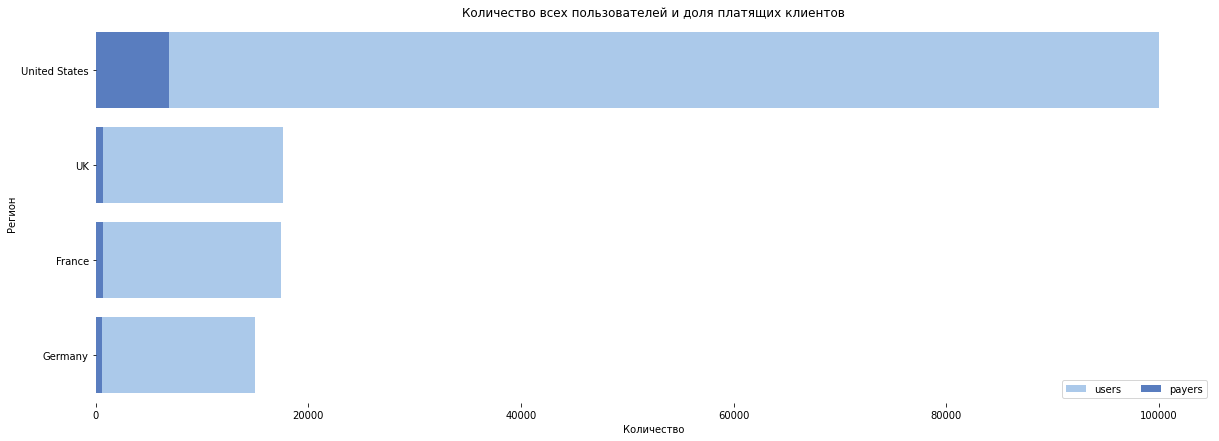

In [35]:
f, ax = plt.subplots(figsize=(20, 7))

#График для всех пользователей по регионам
sns.set_color_codes("pastel")
sns.barplot(x="users", y="region", data=regions,
            label="users", color="b")

#График для платящих пользователей по регионам 
sns.set_color_codes("muted")
sns.barplot(x="payers", y="region", data=regions,
            label="payers", color="b")

#Добавим легенду для информативности 
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

plt.title('Количество всех пользователей и доля платящих клиентов')
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.show();

Вывод:

График наглядно показывает, что доля платящих пользователей выше всего в США (7%), далее идут Германия (4,1%), Великобритания (3,9%) и Франция (3,7%).

Дальнейший анализ бизнес показателей подтвердит или опровергнет успешность приложения в США.

#### Устройства пользователей

Далее узнаем какие устройства предпочитают пользователи приложения.

In [36]:
devices = profiles.groupby('device').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'users'}). \
    sort_values(by='users', ascending=False)

devices

,users
device,
iPhone,54479
Android,35032
PC,30455
Mac,30042


Большинство пользователей предпочитают Iphone в качестве основного устройства, далее идут пользователи Android, а пользователей PC и Mac практически одинаковой количество.

Далее рассмотрим какие устройства предпочитают платящие пользователи:

In [37]:
payers_devices = profiles.query('payer == True'). \
    groupby('device').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'payers'}). \
    reset_index()

payers_devices

,device,payers
0,Android,2050
1,Mac,1912
2,PC,1537
3,iPhone,3382


Объединим датафреймы и посчитаем доли платящих клиентов:

In [38]:
devices = devices.merge(payers_devices, on='device')

devices['payers_fraction'] = (
    devices['payers'] / devices['users']
)

devices

,device,users,payers,payers_fraction
0,iPhone,54479,3382,0.062079
1,Android,35032,2050,0.058518
2,PC,30455,1537,0.050468
3,Mac,30042,1912,0.063644


Визуализируем полученные данные:

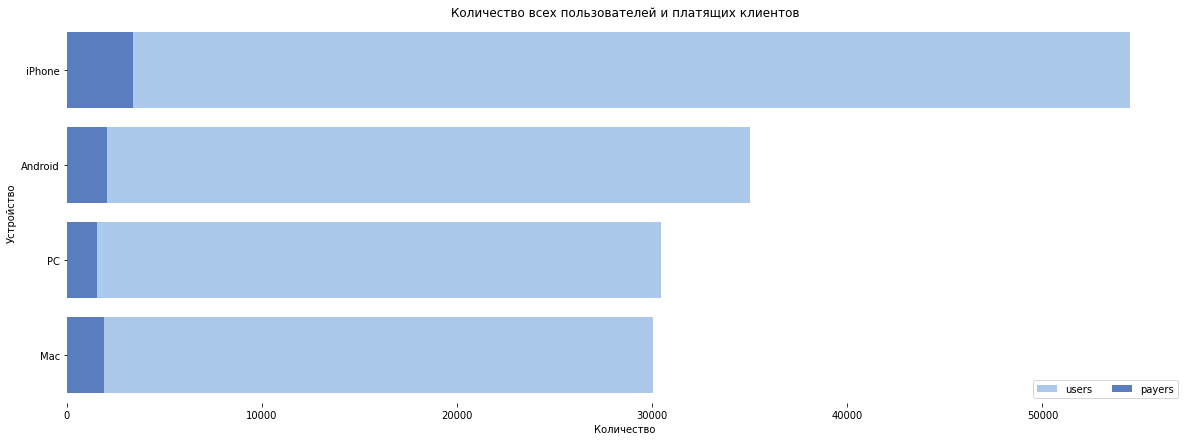

In [39]:
f, ax = plt.subplots(figsize=(20, 7))

#График для всех пользователей по регионам
sns.set_color_codes("pastel")
sns.barplot(x="users", y="device", data=devices,
            label="users", color="b")

#График для платящих пользователей по регионам 
sns.set_color_codes("muted")
sns.barplot(x="payers", y="device", data=devices,
            label="payers", color="b")

#Добавим легенду для информативности 
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

plt.title('Количество всех пользователей и платящих клиентов')
plt.xlabel('Количество')
plt.ylabel('Устройство')
plt.show();

Вывод:

Пользователи Iphone преоплажают среди платящих пользователей. Так же стоит отметить, что в долевом отношении платящими чаще становятся пользователи мобильных устройств, нежели десктопов.

#### Рекламные источники привлечения пользователей.

Узнаем какие каналы привлекли пользователей в исследуемое приложение.

In [40]:
channels = profiles.groupby('channel').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'users'}). \
    sort_values(by='users', ascending=False)

channels

,users
channel,
organic,56439
FaceBoom,29144
TipTop,19561
OppleCreativeMedia,8605
LeapBob,8553
WahooNetBanner,8553
RocketSuperAds,4448
MediaTornado,4364
YRabbit,4312


Невооруженным глазом видно, что приобладает канал organic, то есть пользователи находят приложение самостоятельно, не опираясь на какие-либо рекламные компании, следовательно маркетинговые бюджеты в этом случае не расходуются.
Далее следуют каналы FaceBoom и TipTop, где, как раз, используется маркетинговый бюджет на привлечение.

Далее рассмотрим благодаря каким каналам прилекаются платящие пользователи и узнаем их долю.

In [41]:
payers_channels = profiles.query('payer == True'). \
    groupby('channel').agg({'user_id': 'nunique'}). \
    rename(columns={'user_id': 'payers'}). \
    reset_index()

payers_channels

,channel,payers
0,AdNonSense,440
1,FaceBoom,3557
2,LeapBob,262
3,MediaTornado,156
4,OppleCreativeMedia,233
5,RocketSuperAds,352
6,TipTop,1878
7,WahooNetBanner,453
8,YRabbit,165
9,lambdaMediaAds,225


Объединим датафреймы и посчитаем долю платящих клиентов для каждого канала привлечения:

In [42]:
channels = channels.merge(payers_channels, on='channel')

channels['payers_fraction'] = (
    channels['payers'] / channels['users']
)

channels

,channel,users,payers,payers_fraction
0,organic,56439,1160,0.020553
1,FaceBoom,29144,3557,0.122049
2,TipTop,19561,1878,0.096007
3,OppleCreativeMedia,8605,233,0.027077
4,LeapBob,8553,262,0.030633
5,WahooNetBanner,8553,453,0.052964
6,RocketSuperAds,4448,352,0.079137
7,MediaTornado,4364,156,0.035747
8,YRabbit,4312,165,0.038265
9,AdNonSense,3880,440,0.113402


Визуализируем полученные данные:

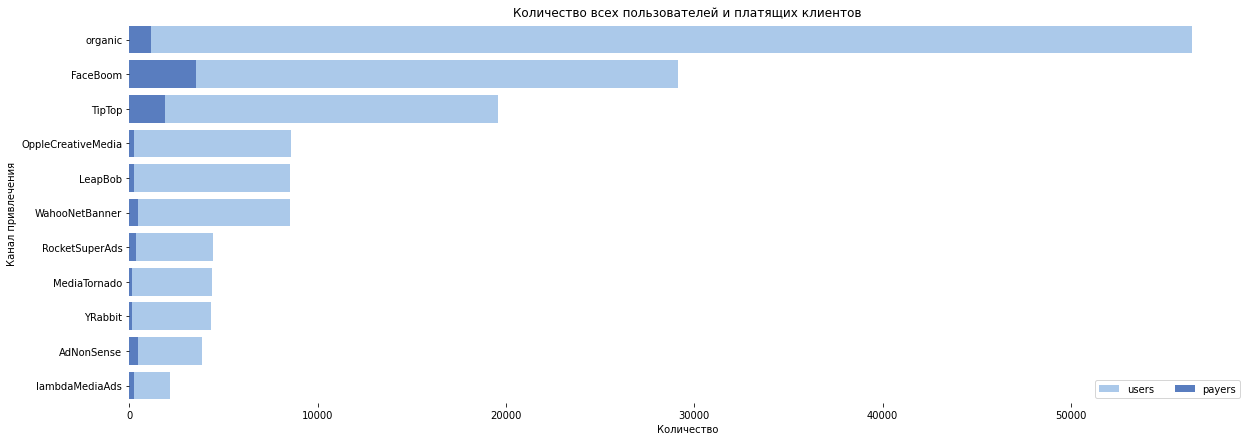

In [43]:
f, ax = plt.subplots(figsize=(20, 7))

#График для всех пользователей по регионам
sns.set_color_codes("pastel")
sns.barplot(x="users", y="channel", data=channels,
            label="users", color="b")

#График для платящих пользователей по регионам 
sns.set_color_codes("muted")
sns.barplot(x="payers", y="channel", data=channels,
            label="payers", color="b")

#Добавим легенду для информативности 
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

plt.title('Количество всех пользователей и платящих клиентов')
plt.xlabel('Количество')
plt.ylabel('Канал привлечения')
plt.show();

Вывод:

Канал FaceBoom лидирует по привлечению платящих пользователей, следом за ним следуют TipTop и organic. Доля привлечения остальных маркетинговых инструментов гораздо ниже, самые низкие показатели у YRabbit и MediaTornado.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг.

Определим затраты приложение на маркетинг:

In [44]:
channel_costs = profiles.groupby('channel'). \
    agg({'acquisition_cost': 'sum'}). \
    sort_values(by='acquisition_cost', ascending=False)

channel_costs

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Суммурные затраты на маркетинг:

In [45]:
channel_costs['acquisition_cost'].sum()

105497.29999999884

Посчитаем долю затрат от общего рекламного бюджета для каждого источника: 

In [46]:
channel_costs['ad_cost_part'] = \
    channel_costs['acquisition_cost'] / \
    channel_costs['acquisition_cost'].sum()

channel_costs

,acquisition_cost,ad_cost_part
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


Визуализируем сумамрные маркетинговые расходы:

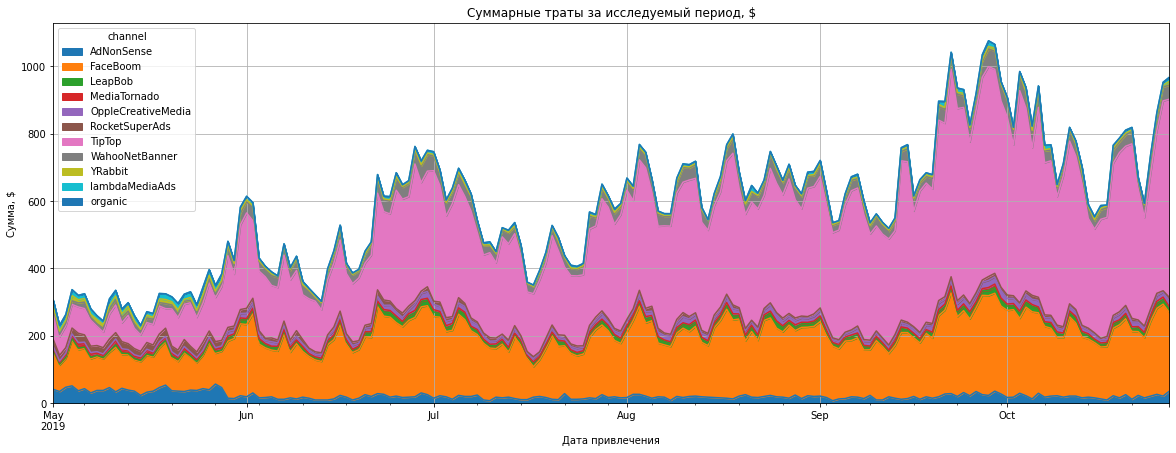

In [47]:
profiles.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='sum'
).plot.area(grid=True, figsize=(20, 7))
plt.ylabel('Сумма, $')
plt.xlabel('Дата привлечения')
plt.title('Суммарные траты за исследуемый период, $')
plt.show()

Вывод:

Суммарно маркетинговый бюджет превышает 100 тысяч. Больше всего средств было потрачено на источники TipTop и FaceBoom - больше 80% отобщего бюджета.

#### Динамика изменения маркетинговых расходов.

Узнаем какие затраты в среднем приходились на каждый источник привлечения пользователей. При этом исключим органический трафик.

In [48]:
profiles = profiles.query('channel != "organic"')

report = profiles.pivot_table(
    index='dt',
    columns='channel',
    values='acquisition_cost',
    aggfunc='mean'
)

report.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,1.050000,1.089423,0.21000,0.240000,0.236111,0.540000,0.975610,0.568421,0.289286,0.765217
2019-05-02,0.962500,1.084722,0.18375,0.229091,0.265625,0.565500,1.000000,0.514286,0.253846,0.730435
2019-05-03,1.050000,1.128947,0.21000,0.232000,0.239583,0.528387,1.049180,0.600000,0.310345,0.730435
2019-05-04,1.008824,1.108943,0.19950,0.212727,0.250000,0.531818,0.972222,0.540000,0.294340,0.733333
2019-05-05,1.020833,1.080531,0.20087,0.230000,0.250000,0.561122,1.012987,0.600000,0.290909,0.752941


Построим график средних затрат на маркетинг:

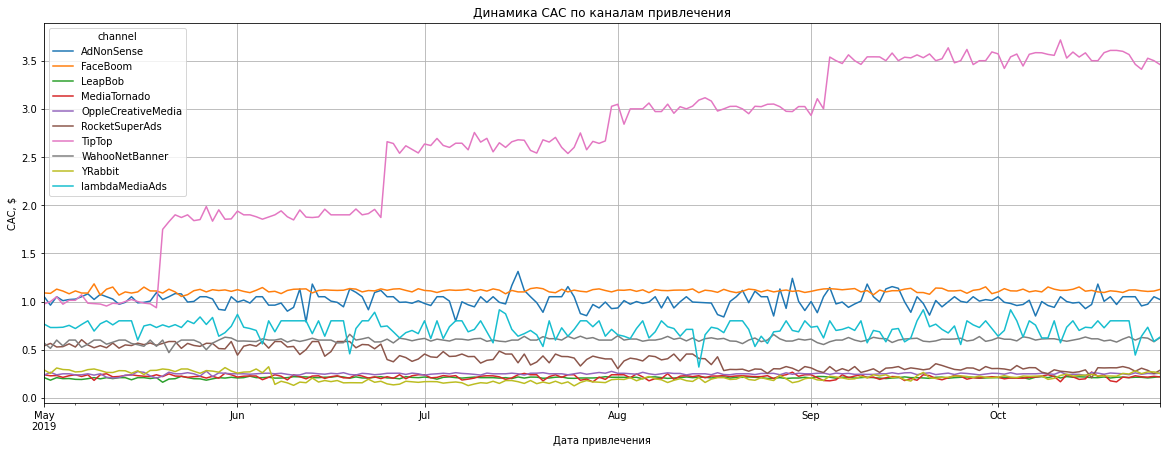

In [49]:
report.plot(grid=True, figsize=(20, 7))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Вывод:

По графику заметно, что расходы на канал привлечения TipTop повышались каждый месяц за исследуемый период. Есть основания считать6 что это могло привести к большим маркетинговым затратам.
В то же время затраты на привлечение пользователей через канал FaceBoom оставались неизменными все время исследуемого периода.

Посчитаем средние траты за период исследования:

In [50]:
report.reset_index().drop(columns='dt').mean(). \
    sort_values(ascending=False)

channel
TipTop                2.655599
FaceBoom              1.112864
AdNonSense            1.010467
lambdaMediaAds        0.721029
WahooNetBanner        0.599336
RocketSuperAds        0.406634
OppleCreativeMedia    0.249327
MediaTornado          0.218692
YRabbit               0.211194
LeapBob               0.209443
dtype: float64

#### Привлечение одного пользователя.

Найдем среднюю стоимость привлечения пользователя 

In [51]:
cac_mean = profiles['acquisition_cost'].sum() /\
    profiles['user_id'].nunique()

print('Средний СAC на одного пользователя: {:}'.format(
       cac_mean))

Средний СAC на одного пользователя: 1.1274813239427588


Вывод:

Средняя стоимость привлечения одного пользователя - 1,1.

Самые высокие затраты приходятся на канал привлечения TipTop. Второй  по затратам - FaceBoom. Любопытно, что на 3-м месте канал AdNonSense, на который тратится в среднем практически столько же, как и на FaceBoom, но приносит он в разы меньше платящих пользователей. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Окупаемость рекламы 

Проанализируем окупаемость рекламы с помощью графиков LTV и ROI, а так же графиков динамики LTV, CAC и ROI

Сначала зададим горизонт анализа, указанный в техническом задании.

In [54]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Расчет показателей LTV и ROI:

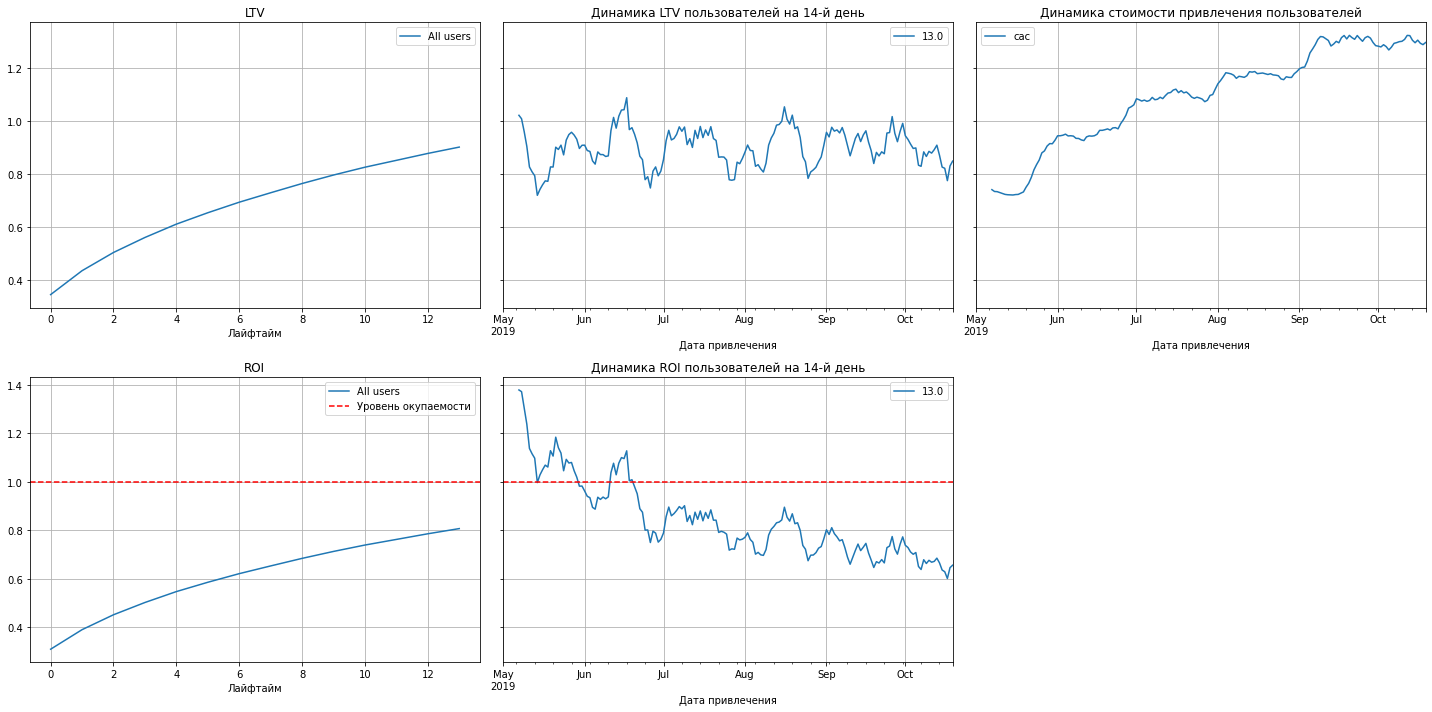

In [55]:
ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days
)

Вывод: 

Динамика LTV ровная, стабильная. LTV к концу второй недели примерно такой же, как в начале и в течение всего промежутка, однако САС (расходы на привлечение) увеличивается. В связи с этим, окупаемость падает. В июле ROI  перешел границу окупаемости и стремительно уменьшался. В связи с этим можно сделать вывод, что реклама не окупается, а это является проблемой для бизнеса.

#### Окупаемость рекламы с разбивкой по устройствам.

Оценим показатели LTV и ROI с разбивкой по устройствам пользователей.

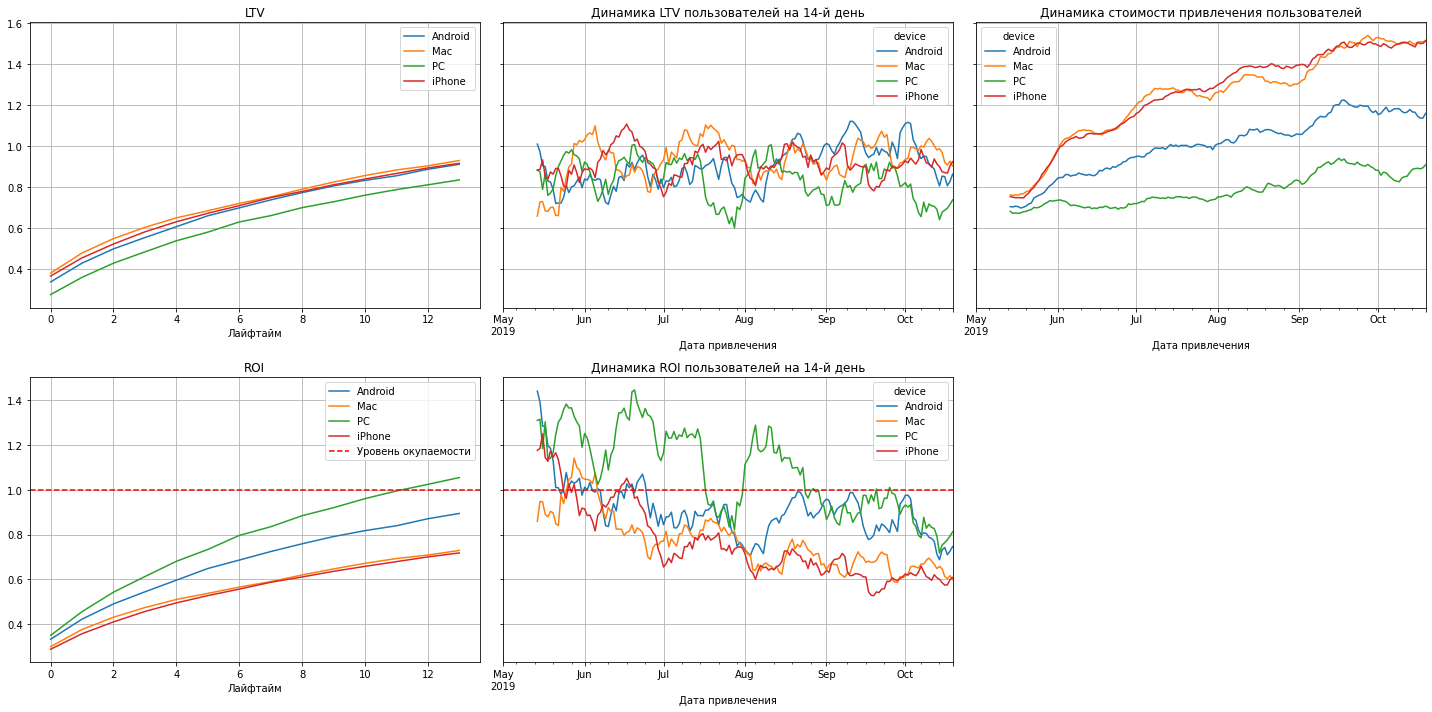

In [56]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=14
)

Вывод:

- Показатель LTV и его динамика стабильны;
- Динамика стоимости привлечения пользователей поднимается, как мы уже ранее замечали, это движение затронуло пользователей всех устройств;
- ROI на графике показывает наличие прибыли на устройствах - PC, метрика для девайсов iPhone и Mac, Android показывает отсутствие окупаемости.
- Снижение динамики ROI также наблюдается по всем устройствам.

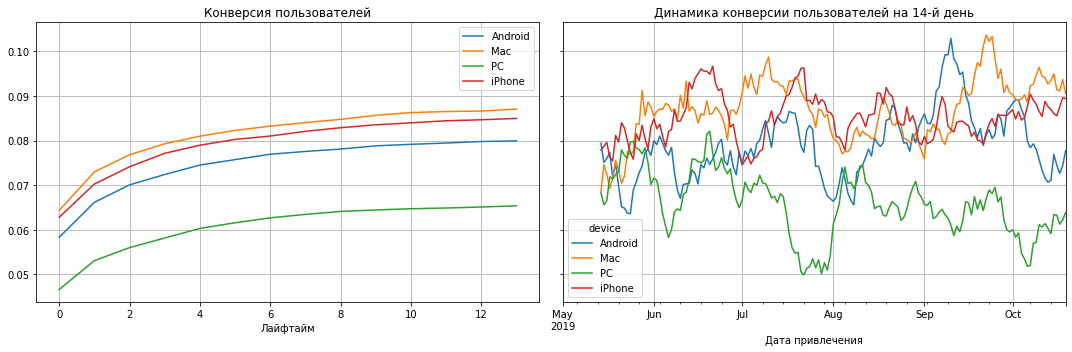

In [57]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=14
)

Конверсия пользователей в разбивке по устройствам показывает стабильность. Динамика конверсии для пользователей с утсройствами iPhone и Mac выше чем у других.

Проверим удержание пользователей.

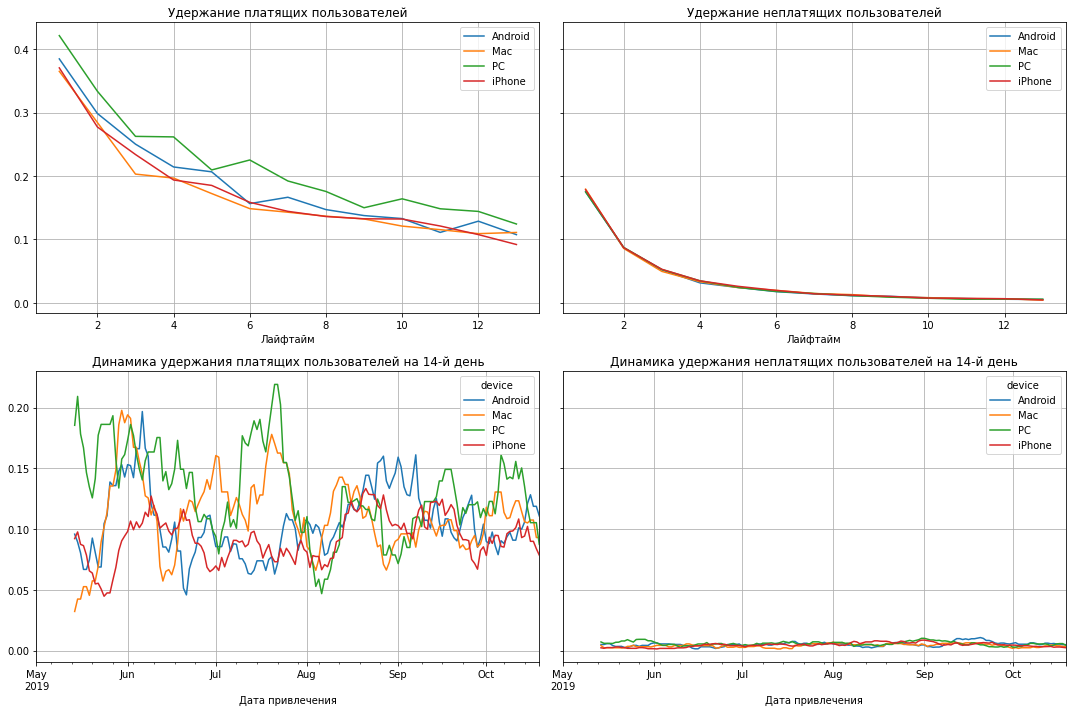

In [58]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=14
)

По графикам можно сказать, что удержание платящих пользователей в основном направлено на клиентов с устройством PC, это может быть причиной не окупаемости рекламной компании для устройств Mac и iPhone. Возможно, стоит пересмотреть сценарий пользователя для этих устройств, потому что PC не обладает такой большой долей платящих клиентов, как iPhone, Mac или Android. Хотя последний в отличии от двух других приносит прибыль для приложения.

Неплатящие пользователи, в разбивке по устройствам, показывают стабильность в динамике удержания, также и в самой бизнес-метрике.

#### Окупаемость рекламы с разбивкой по странам.

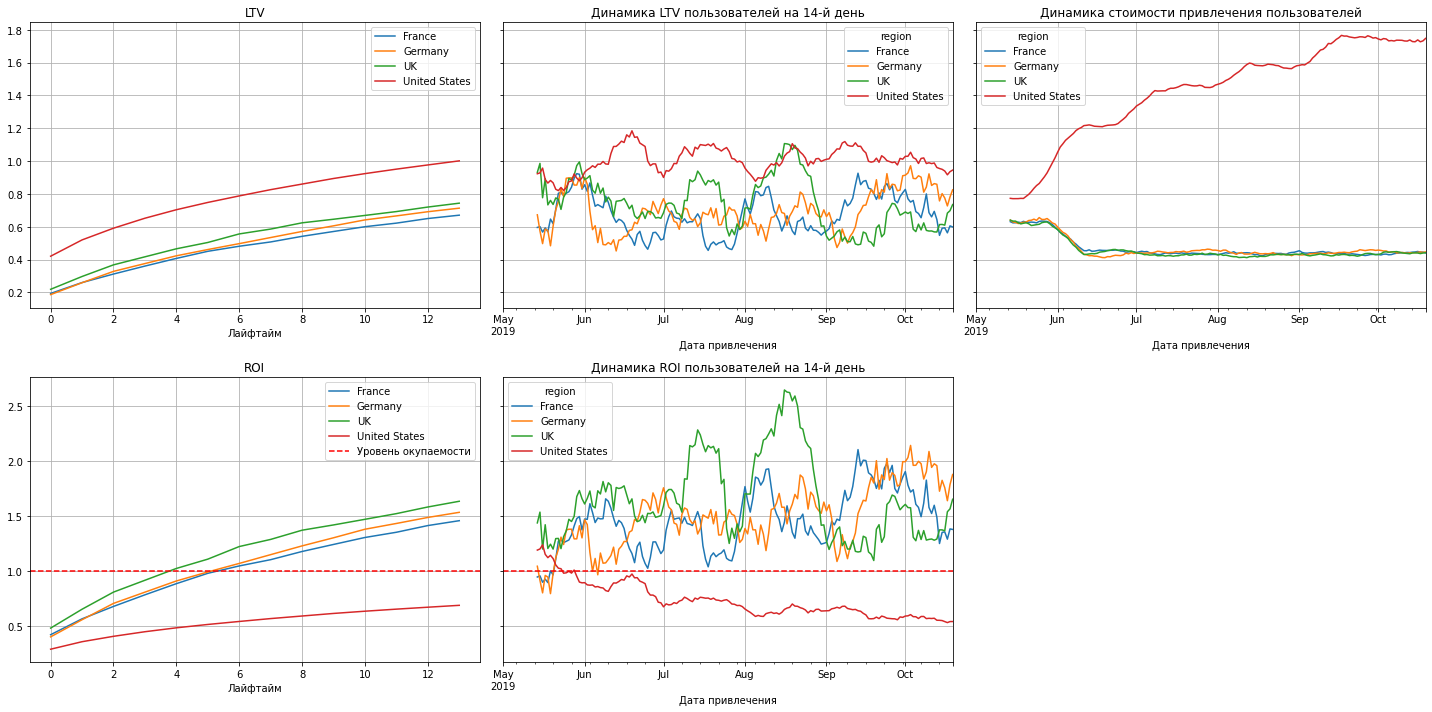

In [59]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=14
)

Привлечение пользователей из США не окупается, а динамика стоимости привлечения растет. Динамика ROI у этого региона снижается на протяжении всего исследуемого периода. В остальных регионах все хорошо - LTV и его динамика, динамика стоимости привлечения, динамика ROI стабильны, а показатель ROI выше уровня окупаемости.

Проверим в чем может скрываться проблема отсутствия окупаемости и снижение его динамики при больших тратах на рекламный бюджет относительно исследуемых регионов. Возможно стоит изучить рекламную компанию в США, для выяснения причин такого низкого показателя ROI.

Для началаа проверим конверсию из неплатящих пользователей в платящих в разбивке по странам.

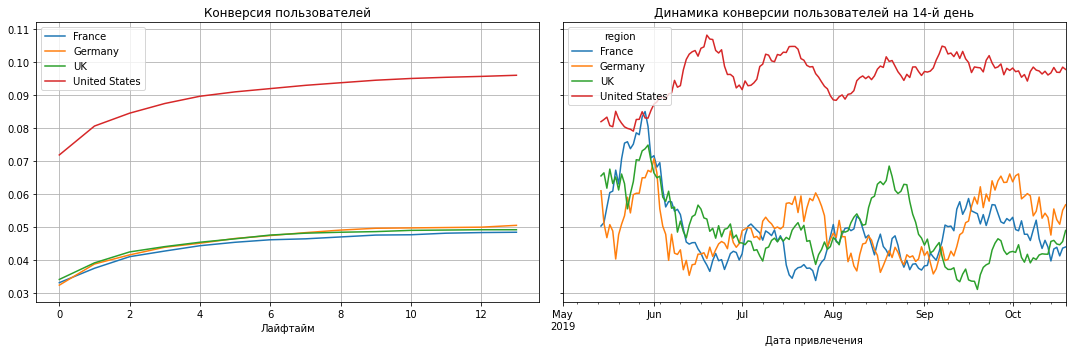

In [60]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=14
)

США лидирует с высокими уровнями конверсии и ее динамики. Значит проблема кроется точно не в ней. Проверим удержание пользователей.

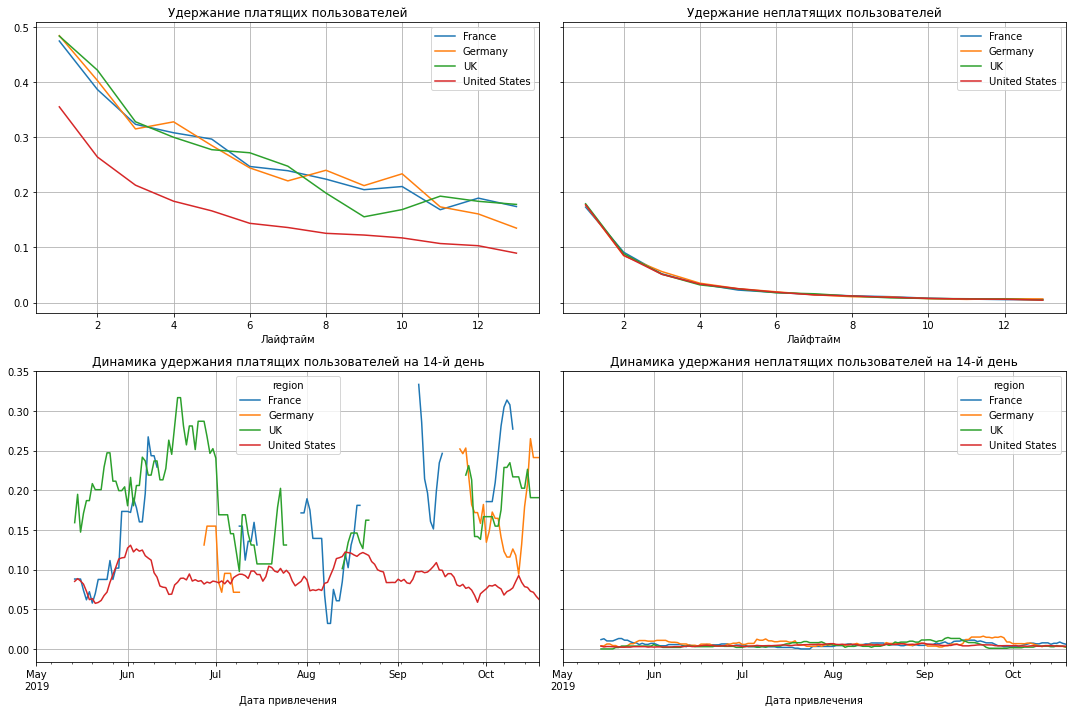

In [61]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=14
)

Удержание пользователей в проблемном регионе действительно очень низкое - ниже чем на остальных территориях. Динамика удержания также выделяется своим низким уровнем относительно остальных.

Низкое удержание при высокой стоимости привлечения является большой проблемой, особенно, когда твоя основная аудитория находится в регионе с такими показателями.

Можно связать графики выше и ранее полученные данные, и сделать предположение, что динамика стоимости привлечения принадлежит самому дорогому источнику трафика. Каналу TipTop принадлежит такая динамика стоимости привлечения, и кривая этого графика, практически, в точности повторяет представленную на графике динамики САС по каналам привлечения. Этот канал может быть направлен на работу только с регионом США. Можно предположить, что проанализированные данные свидетельствуют о неправильно выбранной маркетинговой стратегии.

#### Окупаемость рекламы с разбивкой по рекламным каналам.

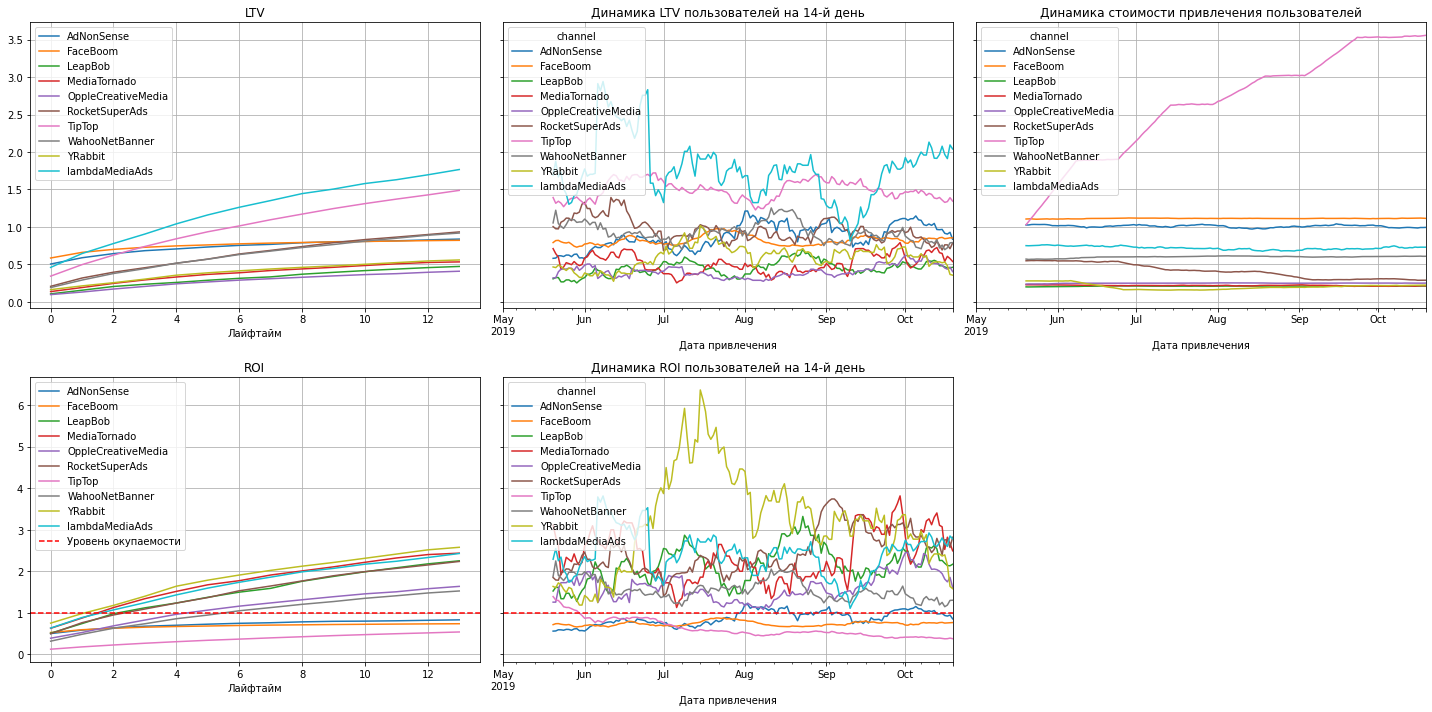

In [62]:
# вызовем функцию get_ltv()

ltv_raw, ltv, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_ltv_roi()

plot_ltv_roi(ltv,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon_days,
    window=20
)

- LTV имеет форму приблеженную к эталонной, самым низким показателем обладает канал organic, а самым высоким lambdaMediaAds;
- Динамика LTV практически стабильна, исключение составляют лишь колебания канала lambdaMediaAds;
- Динамика стоимости привлечения пользователей имеет повышение значений по каналу привлечения TipTop, все как мы видели ранее;
- В каналы с отсутствием окупаемости вошли: FaceBoom, TipTop, AdNonSense.
- По графику динамики ROI каналы FaceBoom, TipTop, AdNonSense не окупаются.


Проверим конверсию и удержание по каналам привлечения.

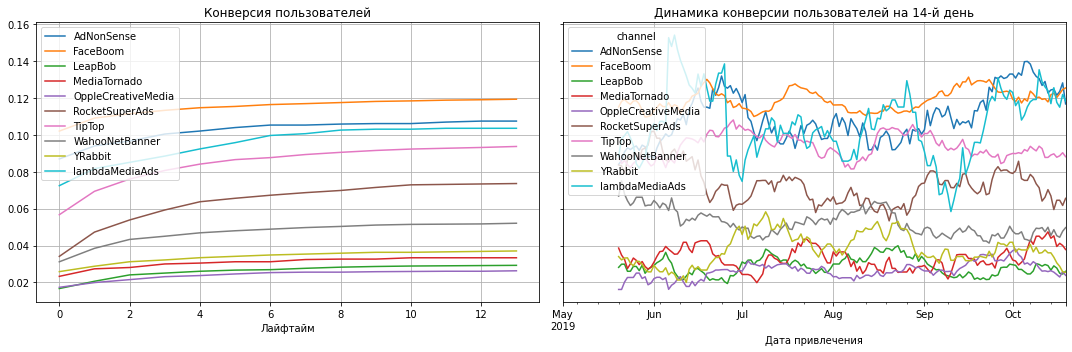

In [63]:
# вызовем функцию get_convertion()

conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_conversion()

plot_conversion(conversion,
    conversion_history,
    horizon_days,
    window=20
)

Самой высокой конверсией обладает канал FaceBoom. Ранее мы выяснили, что доля платящих пользователей привлеченных этим каналом занимает около 40% всех пользователей приложения. Самой низкой конверсией обладают пользователи, пришедшие естесственным путем.

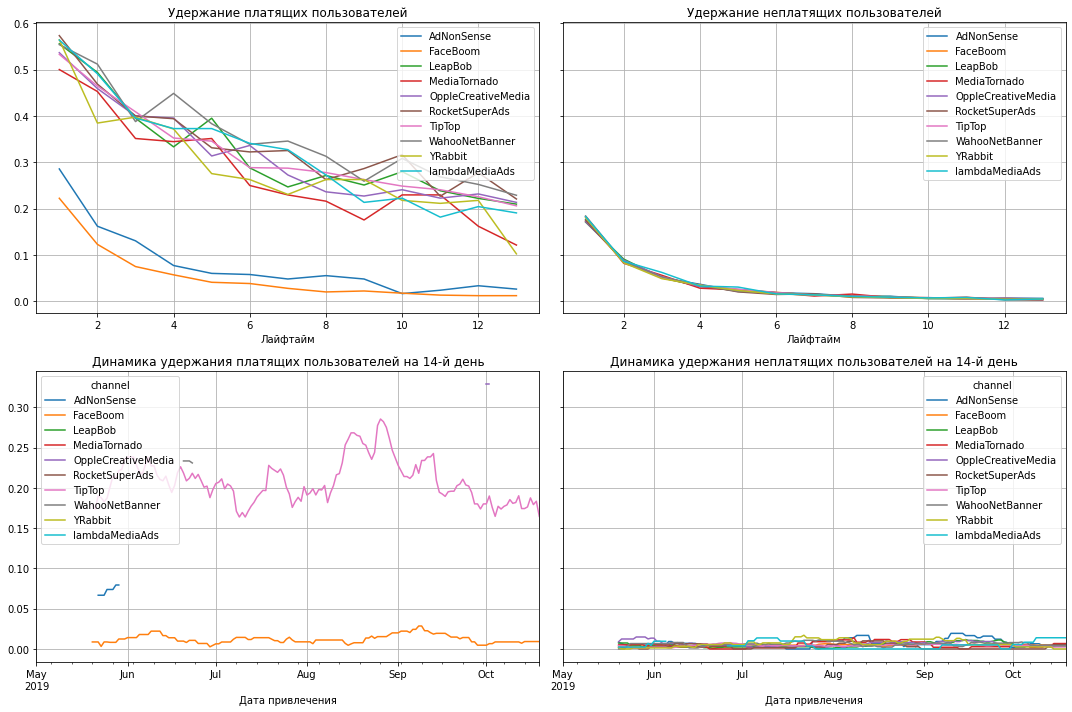

In [64]:
# вызовем функцию get_retention()

retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel']
)

# вызовем функцию plot_retention()

plot_retention(retention,
    retention_history,
    horizon_days,
    window=20
)

Удержание платящих пользователей по каналу TipTop среднее, не самое низкое и не самое высокое. Динамика удержания по каналу FaceBoom показывает показатель близкий к нулю, этот же показатель у канала TipTop находится в весьма адекватном положении. FaceBoom канал с хорошей конверсией, но с плохим удержанием платящих пользователей, принес нашему приложению большее количетсво этих самых пользователей за исследуемый период. Также плохим удержание обладает канал AdNonSense.

Если смотреть данные в целом, то реклама не окупается.

Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- Негативное влияние на окупаемость рекламы со стороны устройств могут оказать iPhone. Думаю, это связано со специфической и уникальной системой входа и устройства.

- Негативное влияние со стороны стран оказывает США. Рекламные источники не окупаются в данном регионе.

- Негативное влияние со стороны рекламных каналов оказывает TipTop. В данный канал вкладывается большая часть денежных средств, но это не влечет за собой отдачи для бизнеса).


Проблемы окупаемости связаны с неверным распределение денежных средств в рекламный источник TipTop, который не окупается и не првлекает пользователей. Однако в топ-3 рекламных источника деньги привлекаются в значительно меньшем объеме. Если перераспределить средства, то окупаемость будет выше и возможна работа без значительных убытков.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В ходе исследования проведен анализ периода работы приложения с привлечением пользователей:

Минимальная дата привлечения пользователей — 01.05.2019 год.
Максимальная дата привлечения пользователей — 27.10.2019 год.
Общий период анализа почти полгода (179 дней, 5,9 мес.)

Изученные данные показали, что:

Пользователи приходят из США, Великобритании, Франции и Германии. Большая доля платящих пользователей приходится на США.
Пользователи используют следующие устройства — iPhone, Android, Mac, PC. Самые популярные по использованию среди платящих пользователей — Mac и iPhone.
Большая доля платящих пользователей приходят через следующие рекламные источники привлечения: FaceBoom, AdNonSense, lambdaMediaAds.
Общая сумма расходов на маркетинг: 105497 д.е.

Больше всего денег потрачено на рекламный источник TipTop. TipTop не вошел в тройку самых популярных источников привлечения платежных пользователей. На FaceBoom (самый популярный источник) тратится почти в два раза меньше, чем на TipTop.

Привлечение одного пользователя из самой вкладываемой рекламной сети «TipTop» обошлось компании в среднем в 3.5. Остальные от 0.25 до 1.2.

Средний CAC для всего проекта составляет - 0.7, средний CAC без канала TipTop составляет - 0.39.

Количество всех профилей пользователей: 150008 Количество профилей пользователей без "organic": 93569

Динамика LTV ровная, стабильная, LTV к концу второй недели примерно такой же, как в начале и в течение всего промежутка, однако САС (расходы на привлечение) увеличивается. В связи с этим, окупаемость падает. В июле ROI бесповоротно перешел границу окупаемости и стремительно уменьшался.

Удержание платящих пользователей снижается, но не как у неплатящих — у них все стремится к нулю, а на 14-й день совсем сравнялось с нулем. У платящих на 14-й день имеется стабильность и часто резкие скачки.

Значительное отклонение имеет регион США, причем только США падает ниже порога окупаемости, в нее также владывается больше всего средств. Вероятно, именно из-за США все графики выше падали ниже порога.

Проблемы окупаемости связаны с неверным распределение денежных средств в рекламный источник TipTop, который не окупается и не првлекает пользователей. Однако в топ-3 рекламных источника деньги привлекаются в значительно меньшем объеме. Если перераспределить средства, то окупаемость будет выше и возможна работа без значительных убытков.

Рекомендации для отдела маркетинга:

Рекомендуется пересмотреть распределение финансовых средств в регионе США и перенаправить их с рекламного источника привечения TipTop на топ-3 популярных источника — FaceBoom(12,2%), AdNonSense(11,3%), lambdaMediaAds (10,5%).

Данное перераспределение позволит увеличить удержание пользователей, увеличить прибыль и снизить убытки.